In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df_train = pd.read_csv(r'.\Datasets\Breast-Cancer\breast-cancer-train.csv')
df_test = pd.read_csv(r'.\Datasets\Breast-Cancer\breast-cancer-test.csv')

In [17]:
df_test_negative = df_test.loc[df_test.Type == 0,['Clump Thickness','Cell Size']]
df_test_positive = df_test.loc[df_test.Type == 1,['Clump Thickness','Cell Size']]

In [18]:
intercept = np.random.random([1])
coef = np.random.random([2])

In [19]:
lx = np.arange(0,12)
ly = (-intercept-lx*coef[0]/coef[1])

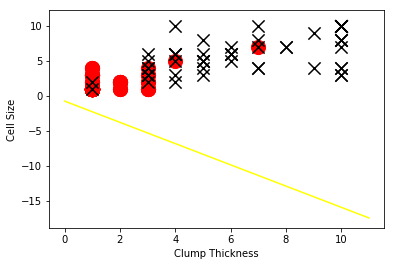

In [20]:
plt.plot(lx,ly,c='yellow')
plt.scatter(x=df_test_negative['Clump Thickness'],y=df_test_negative['Cell Size'],marker='o',s=200,c='red')
plt.scatter(x=df_test_positive['Clump Thickness'],y=df_test_positive['Cell Size'],marker='x',s=150,c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(solver='liblinear',multi_class='auto')

In [23]:
lr.fit(X=df_train[['Clump Thickness','Cell Size']],y=df_train['Type'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
print('Testing accuracy(all training samples):',lr.score(X=df_test[['Clump Thickness','Cell Size']],y=df_test['Type']))

Testing accuracy(all training samples): 0.9371428571428572


In [25]:
intercept=lr.intercept_
coef=lr.coef_[0,:]

In [26]:
ly=(-intercept-lx*coef[0])/coef[1]

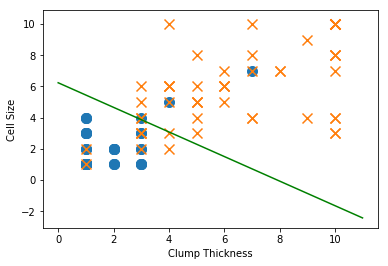

In [27]:
plt.plot(lx,ly,c='green')
plt.scatter(x=df_test_negative['Clump Thickness'],y=df_test_negative['Cell Size'],marker='o',s=100)
plt.scatter(x=df_test_positive['Clump Thickness'],y=df_test_positive['Cell Size'],marker='x',s=100)
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()